In [1]:
import pandas as pd
import numpy as np

In [ ]:
# 코렙 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 서울->타지역
df = pd.read_excel("./시도별 전출입 인구수.xlsx",engine='openpyxl')
df = df.fillna(method='ffill')
df.head()

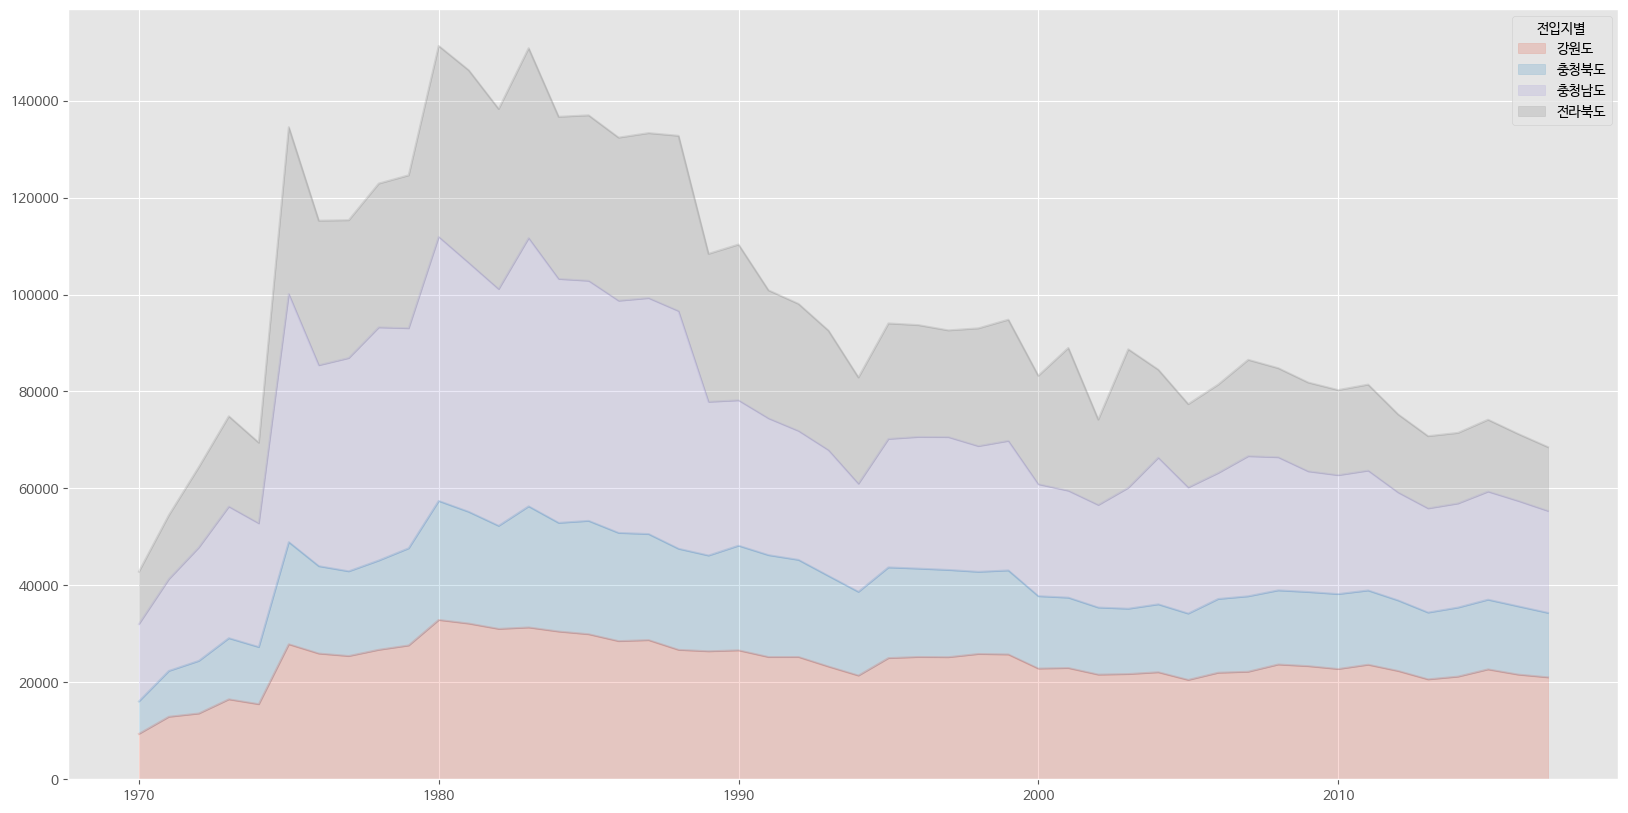

In [13]:
s_index = (df['전출지별'] == '서울특별시') & (df['전입지별'] !='서울특별시')
df_seoul = df[s_index]
df_seoul = df_seoul.loc[:,'전입지별':]
df_seoul = df_seoul.replace('-',np.nan)
df_seoul = df_seoul.reset_index(drop = True)
df_seoul = df_seoul.set_index(['전입지별'])
df_4 = df_seoul.loc[['강원도', '충청북도', '충청남도', '전라북도']]
df_4 = df_4.T
#스타일 지정
plt.style.use('ggplot')
df_4.plot(kind='area', alpha=0.2,figsize = (20,10))
plt.show()

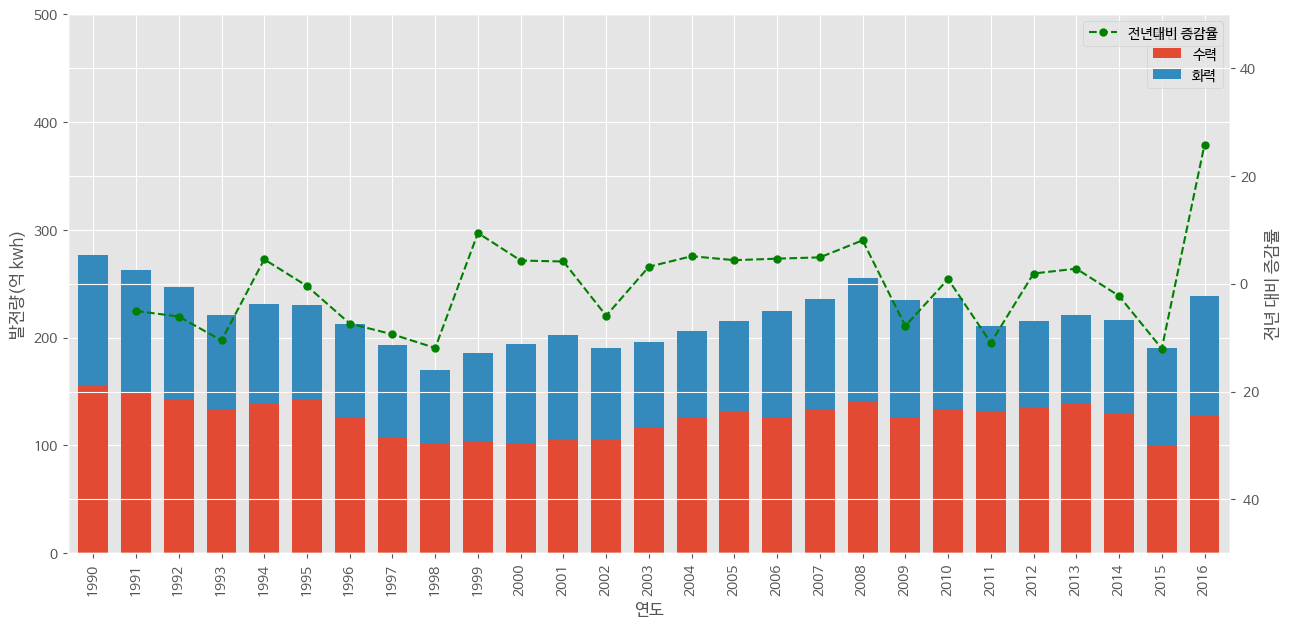

In [51]:
import warnings
warnings.filterwarnings('ignore')

# 북한 전력 발전량
df = pd.read_excel('./남북한발전전력량.xlsx')
df_north = df.loc[5:9]
df_north = df_north.drop(['전력량 (억㎾h)'], axis = 1)
df_north = df_north.set_index('발전 전력별')
df_north = df_north.T
df_north = df_north.rename(columns={'합계':'총발전량'})
df_north['총발전량-1년'] =  df_north['총발전량'].shift(1)
df_north['증감율'] = (df_north['총발전량']/df_north['총발전량-1년']-1)*100
df_north

# 2축 그래프 그리기
ax1 = df_north[['수력','화력']].plot(kind='bar',figsize=(15,7), width=0.7,stacked=True)
ax2 = ax1.twinx()  # X 축은 유지
ax2.plot(df_north.index, df_north.증감율, ls='--', marker='o', markersize=5,c='green',label='전년대비 증감율')
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)
ax1.set_xlabel('연도')
ax1.set_ylabel('발전량(억 kwh)')
ax2.set_ylabel('전년 대비 증감률')
plt.legend()
plt.show()

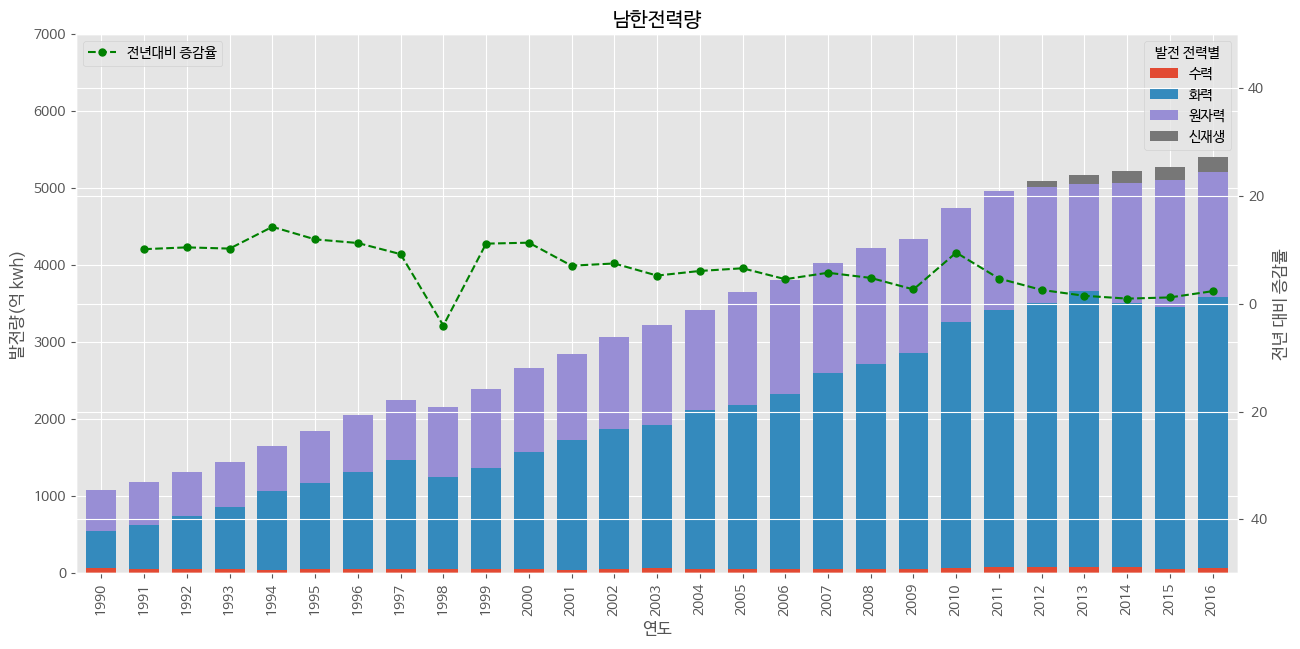

In [81]:
# 남한 전력 발전량
df = pd.read_excel('./남북한발전전력량.xlsx')
df_south = df.loc[:4]
df_south = df_south.drop(['전력량 (억㎾h)'], axis = 1)
df_south = df_south.set_index('발전 전력별')
df_south = df_south.T
df_south = df_south.rename(columns={'합계':'총발전량'})
df_south['총발전량-1년'] =  df_south['총발전량'].shift(1)
df_south['증감율'] = (df_south['총발전량']/df_south['총발전량-1년']-1)*100
df_south = df_south.replace('-',0)
df_south

# 2축 그래프 그리기
ax1 = df_south[['수력','화력','원자력',	'신재생']].plot(kind='bar',figsize=(15,7), width=0.7,stacked=True)
ax2 = ax1.twinx()  # X 축은 유지
ax2.plot(df_south.index, df_south.증감율, ls='--', marker='o', markersize=5,c='green',label='전년대비 증감율')
ax1.set_ylim(0,7000)
ax2.set_ylim(-50,50)
ax1.set_title("남한전력량")
ax1.set_xlabel('연도')
ax1.set_ylabel('발전량(억 kwh)')
ax2.set_ylabel('전년 대비 증감률')
plt.legend(loc='upper left')
plt.show()